# Scooter Data Analysis

## Data loading

In [25]:
from transformations import *

In [26]:
url = r"http://158.160.79.188:8000/GetAll"

frames_by_session_id, sessions_by_session_id = load_frames_by_url(url)

In [27]:
sum(len(frames_by_session_id[key]) / 100 for key in frames_by_session_id)

158.47

In [28]:
batch_size = 100
batches = list()

for session_id in frames_by_session_id.keys():
    print(session_id)
    batches.extend(unite_frames_to_frame_batches(frames_by_session_id[session_id], sessions_by_session_id[session_id], batch_size, step=50))

batches

1702884561711
1702885369203
1702885959961
1702886316591
1702886538311
1702887052896
1702887153353
1702887303208
1702970925611
1702971382346
1702977187278
1702977212729
1702987745386
1702988078073
1702988326163


In [29]:
df = frame_batches_to_dataframe(batches)

In [30]:
df

,average_speed,min_speed,max_speed,average_acceleration,min_acceleration,max_acceleration,average_angle_speed,min_angle_speed,max_angle_speed,time_delta,ride_mode
0,0.009322,0.005747,0.013119,3.592625,0.195034,13.159453,0.557445,0.029589,2.728580,9900,0
1,0.017254,0.005747,0.022040,5.594870,0.648251,47.966851,0.423239,0.029894,2.102343,9901,0
2,0.015129,0.008014,0.022040,8.177330,1.215224,47.966851,0.410825,0.029894,1.126646,9900,0
3,0.008151,0.007715,0.022040,6.361044,0.907821,42.025192,0.434025,0.063969,1.126646,9901,0
4,0.016062,0.007715,0.025092,4.187579,0.600634,16.841888,0.292457,0.048358,0.906830,9899,0
...,...,...,...,...,...,...,...,...,...,...,...
321,0.000000,0.000000,0.000000,0.287444,0.126629,0.468766,0.015073,0.007006,0.024732,358,1
322,0.000000,0.000000,0.000000,0.204749,0.127182,0.435230,0.014257,0.007006,0.021312,246,1
323,0.000000,0.000000,0.000000,0.228214,0.176225,0.307812,0.018222,0.013580,0.021740,223,1
324,0.000000,0.000000,0.000000,0.267019,0.151287,0.307812,0.017334,0.007792,0.021740,533,1


## Analysis

In [9]:
import seaborn as sns
import matplotlib as plt

KeyboardInterrupt: 

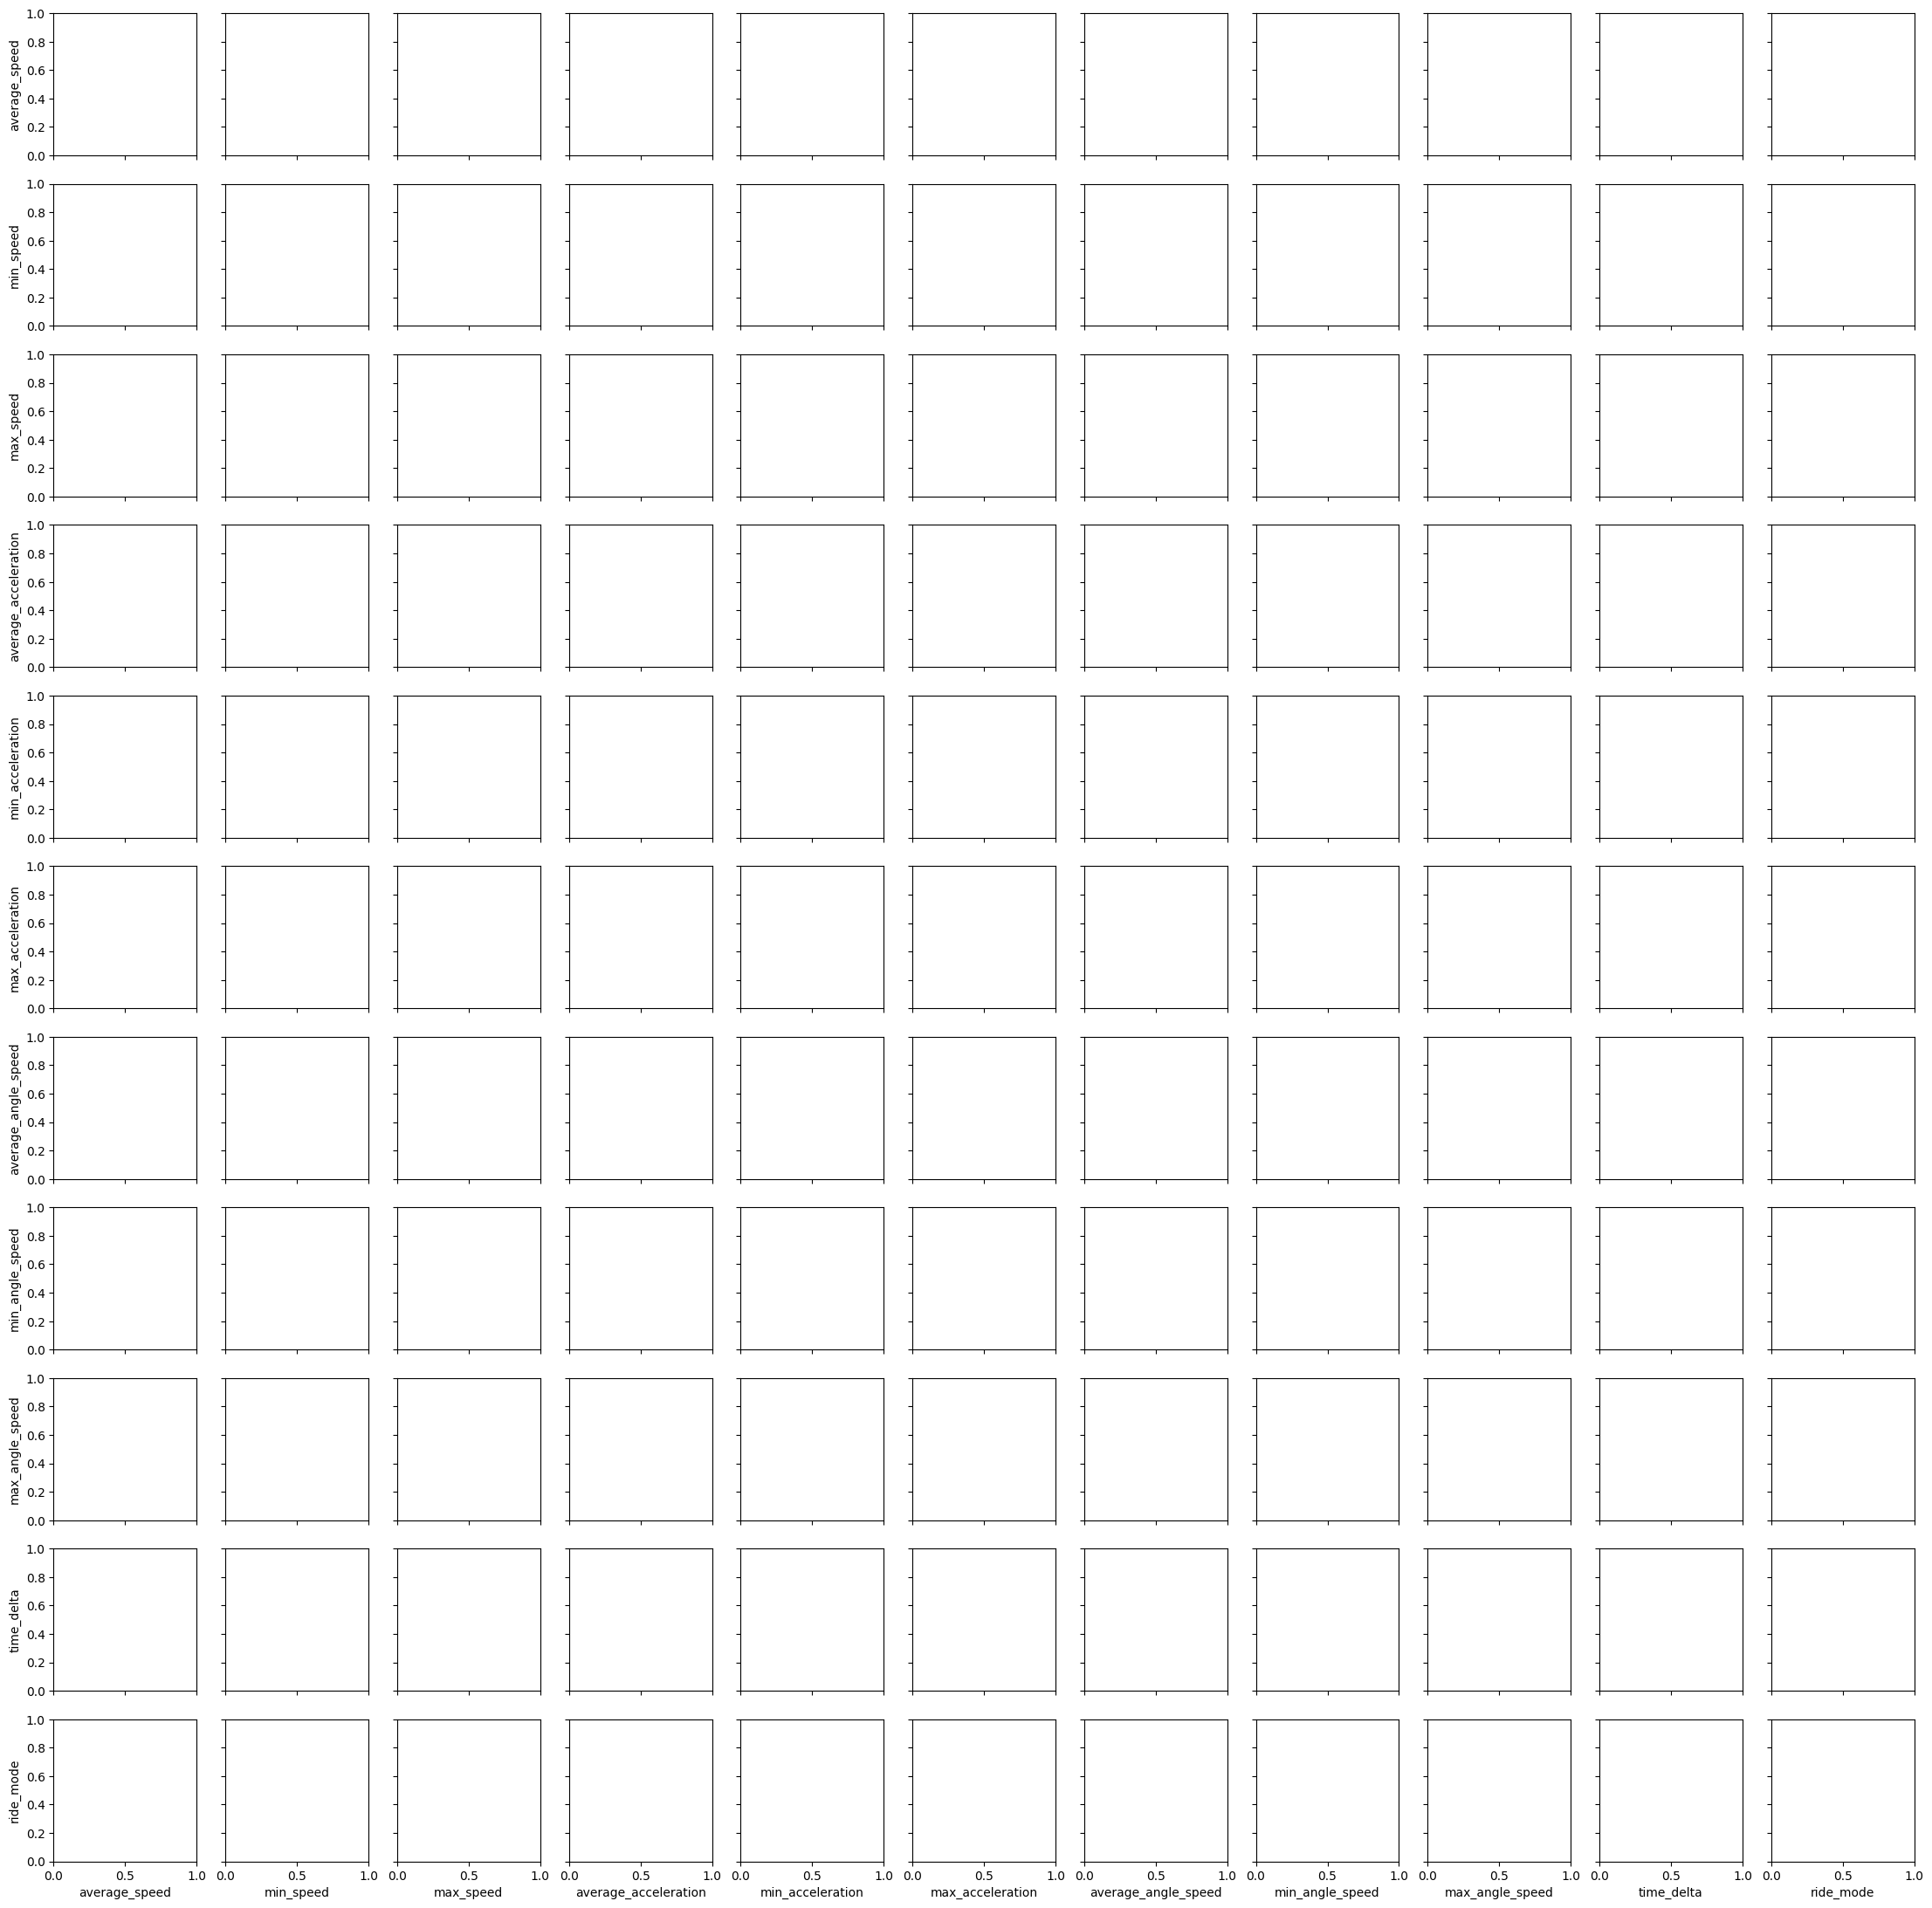

In [10]:
sns.pairplot(df)

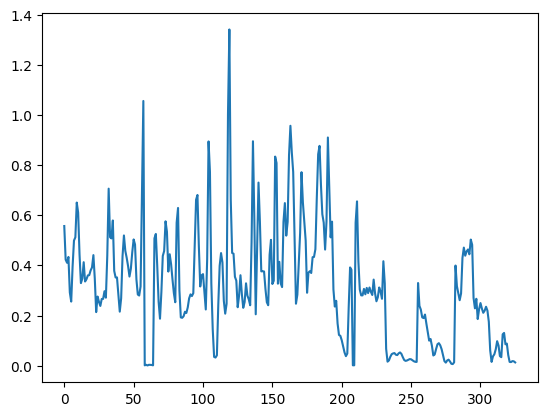

In [35]:
import matplotlib.pyplot as plt

plt.plot(df["average_angle_speed"])

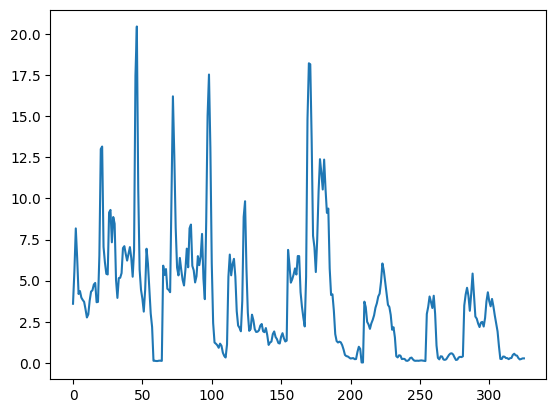

In [36]:
plt.plot(df["average_acceleration"])

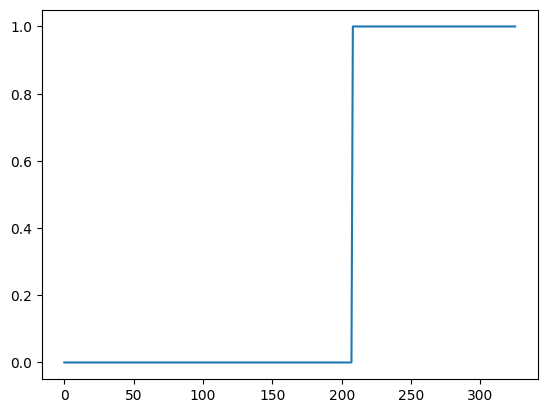

In [38]:
plt.plot(df["ride_mode"])

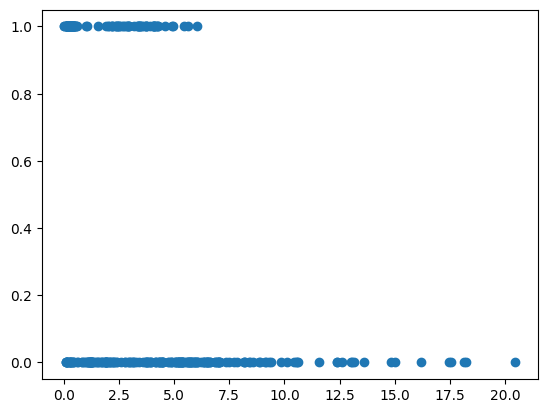

In [41]:
plt.scatter(df["average_acceleration"], df["ride_mode"])

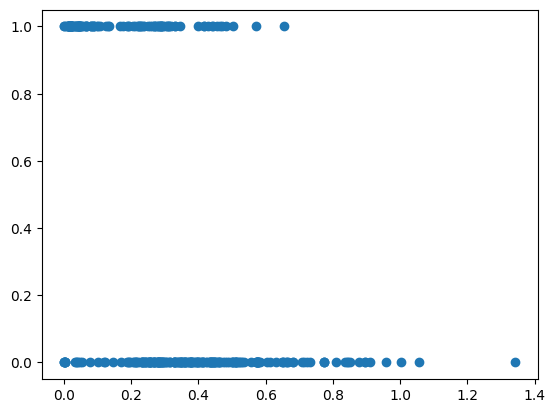

In [42]:
plt.scatter(df["average_angle_speed"], df["ride_mode"])

In [11]:
df["max_speed"]

0       0.013119
1       0.022040
2       0.022040
3       0.022040
4       0.022040
          ...   
1590    0.000000
1591    0.000000
1592    0.000000
1593    0.000000
1594    0.000000
Name: max_speed, Length: 1595, dtype: float64

In [12]:
df.to_csv("data_files/batches_with_intersections.csv", sep=',', index=False, encoding='utf-8')

## Parameters selection

In [19]:
parameters = ["average_acceleration", "min_acceleration", "max_acceleration", 
"average_angle_speed", "min_angle_speed", "max_angle_speed"]
target = "ride_mode"


In [20]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, random_state=0)

X_train = data_train[parameters]
y_train = data_train[target]

X_test = data_test[parameters]
y_test = data_test[target]

## Linear regression

### Model learning

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.744


In [22]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in parameters])
weights

Weight for 'average_acceleration'   -0.555993
Weight for 'min_acceleration'       -0.034218
Weight for 'max_acceleration'       -0.547285
Weight for 'average_angle_speed'    -1.215404
Weight for 'min_angle_speed'        -0.217161
Weight for 'max_angle_speed'         0.175622
dtype: float64

In [23]:
from model_loader import *

In [24]:
save_model(logistic_regression, "data_files/model_75.pickle")

### Model testing

In [27]:
logistic_regression.predict([[1, 0, 2, 3, 1, 2]])

C:\Users\mares\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [14]:
prediction.model_filename = "data_files/model.pickle"

In [3]:
from prediction import get_prediction

In [15]:
for session_id in frames_by_session_id:
    print(get_prediction(frames_by_session_id[session_id], sessions_by_session_id[session_id], 100), sessions_by_session_id[session_id].ride_mode.key)

0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.06666666666666667 0
0.18518518518518517 0
1.0 3
1.0 3
0.5217391304347826 1
0.7142857142857143 1
0.45454545454545453 1


In [16]:
sessions_by_session_id

{1702884561711: <models.session.Session at 0x236903577c0>,
 1702885369203: <models.session.Session at 0x23690357880>,
 1702885959961: <models.session.Session at 0x23690357940>,
 1702886316591: <models.session.Session at 0x23690357a00>,
 1702886538311: <models.session.Session at 0x23690357ac0>,
 1702887052896: <models.session.Session at 0x23690357b80>,
 1702887153353: <models.session.Session at 0x23690357c40>,
 1702887303208: <models.session.Session at 0x23690357d00>,
 1702970925611: <models.session.Session at 0x23690357dc0>,
 1702971382346: <models.session.Session at 0x23690357e80>,
 1702977187278: <models.session.Session at 0x23690357ee0>,
 1702977212729: <models.session.Session at 0x23690357fa0>,
 1702987745386: <models.session.Session at 0x23690357e20>,
 1702988078073: <models.session.Session at 0x236903601c0>,
 1702988326163: <models.session.Session at 0x23690360280>}

In [19]:
[len(frames_by_session_id[session_id]) for session_id in frames_by_session_id]

[2893, 1, 1, 1, 1, 1, 1, 1, 4498, 2644, 44, 46, 2238, 1311, 2166]

## Convolutional neural network

In [45]:
import torch.nn as nn

nn.Conv1d

torch.nn.modules.conv.Conv1d

In [ ]:
batches = 